In [2]:
import numpy as np
from scipy.linalg import inv
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Confidence Regions

Here we are going to analyze the Fisher Matrices obtain for each cosmology: 

1. Confidence Regions

2. Figure of Merit (FoM)

In [10]:
Omega_c0 = 0.2685628338348412

Omega_nu0 = 0.00143717

Omega_b0 = 0.05

Omega_m0 = Omega_c0 + Omega_nu0 + Omega_b0

Omega_DE0 = Omega_lambda = (1-Omega_m0)

w0= -1

wa = 0

Omega_K0 = 1 - (Omega_m0 + Omega_DE0)

h = 0.67

c = 299792

sigma8 = 0.816

ns = 0.96

gamma = 6/11

# $\Lambda CDM$ flat

Parameters:

1. $\Omega_{m,0}$

2. $h$

3. $\Omega_{b,0}$

4. $n_s$

5. $\sigma_8$

In [7]:
Fi_S_F = np.array([[ 1114062.34444458,  3628548.35880427,  1278759.05000664,
         -117573.77043843,   818403.1710311 ],
       [ 3628548.35880427, 12550927.09696479,  4627332.37629999,
         -517504.58531668,  2737870.37248902],
       [ 1278759.05000664,  4627332.37629999,  1855103.72973513,
         -218418.67971088,   975971.74155768],
       [ -117573.77043843,  -517504.58531668,  -218418.67971088,
           84679.65531234,   -60248.34325895],
       [  818403.1710311 ,  2737870.37248902,   975971.74155768,
          -60248.34325895,   648242.19473655]])

In [8]:
cov_matrix = inv(Fi_S_F)

def plot_error_ellipse(ax, cov, pos, nstd=2, **kwargs):
    # Calcula los valores y vectores propios
    eigvals, eigvecs = np.linalg.eigh(cov)
    
    # Ordena los valores propios en orden descendente
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    
    # El ángulo de rotación de la elipse
    theta = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
    
    # Anchura y altura de la elipse
    width, height = 2 * nstd * np.sqrt(eigvals)
    
    # Crear la elipse
    ellipse = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)
    
    ax.add_patch(ellipse)

### $\Omega_{m,0}$ & the others

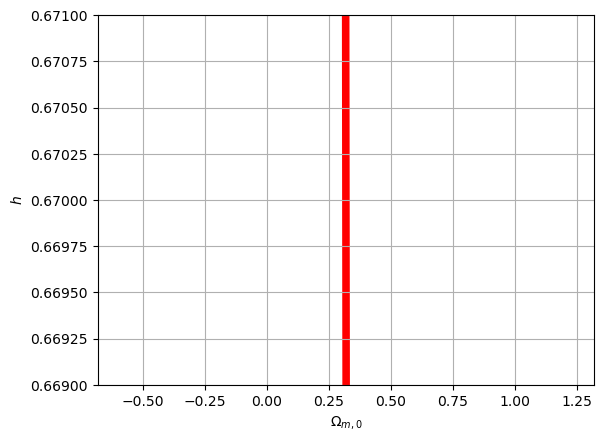

In [22]:
fig, ax = plt.subplots()

cov_ij = cov_matrix[np.ix_([0, 1], [0, 1])]
        
plot_error_ellipse(ax, cov_ij, pos=(Omega_m0, h), nstd=1, edgecolor='red', lw=2, facecolor='none')
plot_error_ellipse(ax, cov_ij, pos=(Omega_m0, h), nstd=2, edgecolor='red', lw=2, facecolor='none')
ax.set_xlim(Omega_m0 -1, Omega_m0 + 1)
ax.set_ylim(h - 0.001, h + 0.001)
        
ax.set_xlabel('$\Omega_{m,0}$')
ax.set_ylabel('$h$')
ax.grid(True)
        
plt.show()

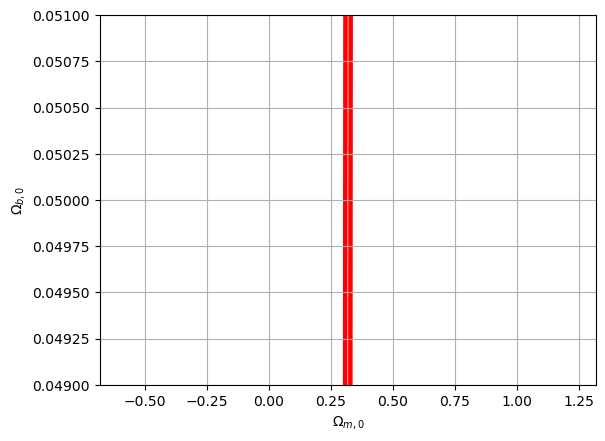

In [25]:
fig, ax = plt.subplots()

cov_ij = cov_matrix[np.ix_([0, 2], [0, 2])]
        
plot_error_ellipse(ax, cov_ij, pos=(Omega_m0, Omega_b0), nstd=1, edgecolor='red', lw=2, facecolor='none')
plot_error_ellipse(ax, cov_ij, pos=(Omega_m0, Omega_b0), nstd=2, edgecolor='red', lw=2, facecolor='none')
ax.set_xlim(Omega_m0 -1, Omega_m0 + 1)
ax.set_ylim(Omega_b0 - 0.001, Omega_b0 + 0.001)
        
ax.set_xlabel('$\Omega_{m,0}$')
ax.set_ylabel('$\Omega_{b,0}$')
ax.grid(True)
        
plt.show()

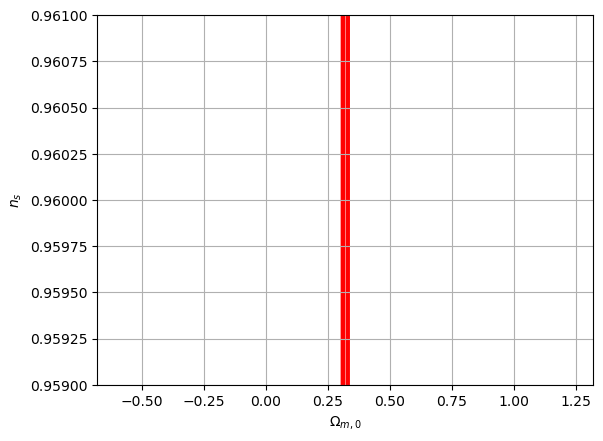

In [26]:
fig, ax = plt.subplots()

cov_ij = cov_matrix[np.ix_([0, 3], [0, 3])]
        
plot_error_ellipse(ax, cov_ij, pos=(Omega_m0, ns), nstd=1, edgecolor='red', lw=2, facecolor='none')
plot_error_ellipse(ax, cov_ij, pos=(Omega_m0, ns), nstd=2, edgecolor='red', lw=2, facecolor='none')
ax.set_xlim(Omega_m0 -1, Omega_m0 + 1)
ax.set_ylim(ns - 0.001, ns + 0.001)
        
ax.set_xlabel('$\Omega_{m,0}$')
ax.set_ylabel('$n_s$')
ax.grid(True)
        
plt.show()

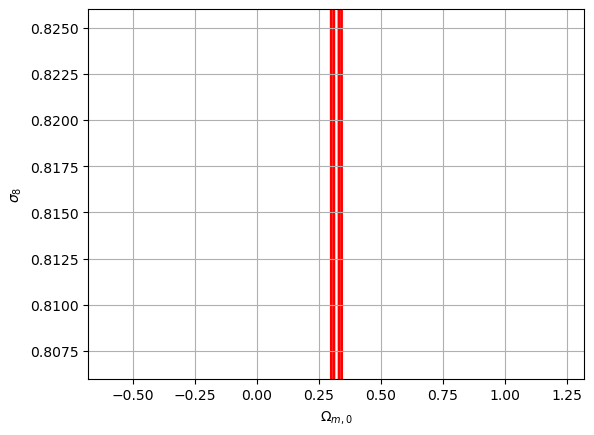

In [28]:
fig, ax = plt.subplots()

cov_ij = cov_matrix[np.ix_([0, 4], [0, 4])]
        
plot_error_ellipse(ax, cov_ij, pos=(Omega_m0, sigma8), nstd=1, edgecolor='red', lw=2, facecolor='none')
plot_error_ellipse(ax, cov_ij, pos=(Omega_m0, sigma8), nstd=2, edgecolor='red', lw=2, facecolor='none')
ax.set_xlim(Omega_m0 -1, Omega_m0 + 1)
ax.set_ylim(sigma8 - 0.01, sigma8 + 0.01)
        
ax.set_xlabel('$\Omega_{m,0}$')
ax.set_ylabel('$\sigma_8$')
ax.grid(True)
        
plt.show()

### $h$ and the others

# $w_0$ and $w_a$ flat

Parameters:

1. $\Omega_{m,0}$

2. $h$

3. $\Omega_{b,0}$

4. $w_0$

5. $w_a$

6. $n_s$

7. $\sigma_8$

## Figure of Merit (FoM)

Must be: 23

In [14]:
Fi_DE_F = np.array([[ 1.51452595e+06,  2.84506913e+06,  8.47833038e+05,
         9.95402818e+04,  2.25471929e+04, -1.43116217e+05,
         9.52490606e+05],
       [ 2.84506913e+06,  5.57079601e+06,  1.73597906e+06,
         2.02346489e+05,  4.61059863e+04, -3.40820827e+05,
         1.81878029e+06],
       [ 8.47833038e+05,  1.73597906e+06,  5.86663737e+05,
         6.43471517e+04,  1.55530295e+04, -1.29034061e+05,
         5.44551630e+05],
       [ 9.95402818e+04,  2.02346489e+05,  6.43471517e+04,
         7.77536492e+03,  1.74162419e+03, -1.43106729e+04,
         6.48305671e+04],
       [ 2.25471929e+04,  4.61059863e+04,  1.55530295e+04,
         1.74162419e+03,  4.21474265e+02, -3.46667779e+03,
         1.44322213e+04],
       [-1.43116217e+05, -3.40820827e+05, -1.29034061e+05,
        -1.43106729e+04, -3.46667779e+03,  8.42265987e+04,
        -5.85782257e+04],
       [ 9.52490606e+05,  1.81878029e+06,  5.44551630e+05,
         6.48305671e+04,  1.44322213e+04, -5.85782257e+04,
         6.44628567e+05]])

cov_matrix = inv(Fi_DE_F)

print(Fi_DE_F[3:5, 3:5])

F_wa_w0 = inv(cov_matrix[3:5, 3:5]) #Elements of the covariance matrix

determinant = np.linalg.det(F_wa_w0)

FoM = np.sqrt(determinant)

print('Figure of merit: ' + str(FoM))

[[7775.36492  1741.62419 ]
 [1741.62419   421.474265]]
Figure of merit: 8.233633434973491


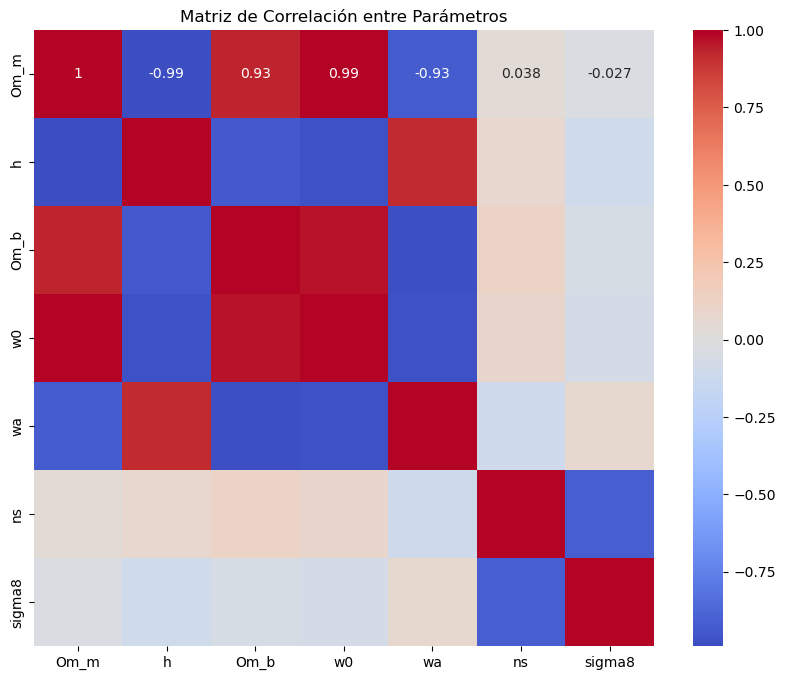

In [105]:
import seaborn as sns

# Invertir la matriz de Fisher para obtener la matriz de covarianza
cov_matrix = inv(Fi_DE_F)

# Calcular la matriz de correlación
diag = np.sqrt(np.diag(cov_matrix))
corr_matrix = cov_matrix / np.outer(diag, diag)

# Etiquetas de los parámetros (puedes ajustarlas según tu modelo)
param_labels = ['Om_m', 'h', 'Om_b', 'w0', 'wa', 'ns', 'sigma8']

# Crear un gráfico de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, xticklabels=param_labels, yticklabels=param_labels, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación entre Parámetros')
plt.show()

In [83]:
cov_matrix = inv(Fi_DE_F)

def plot_error_ellipse(ax, cov, pos, nstd=2, **kwargs):
    # Calcula los valores y vectores propios
    eigvals, eigvecs = np.linalg.eigh(cov)
    
    # Ordena los valores propios en orden descendente
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    
    # El ángulo de rotación de la elipse
    theta = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
    
    # Anchura y altura de la elipse
    width, height = 2 * nstd * np.sqrt(eigvals)
    
    # Crear la elipse
    ellipse = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)
    
    ax.add_patch(ellipse)

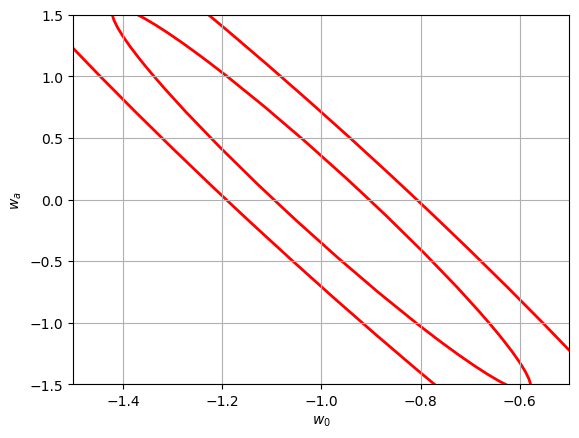

In [84]:
fig, ax = plt.subplots()

cov_ij = cov_matrix[np.ix_([3, 4], [3, 4])]
        
plot_error_ellipse(ax, cov_ij, pos=(-1, 0), nstd=1, edgecolor='red', lw=2, facecolor='none')
plot_error_ellipse(ax, cov_ij, pos=(-1, 0), nstd=2, edgecolor='red', lw=2, facecolor='none')
ax.set_xlim(-1.5, -0.5)
ax.set_ylim(-1.5, 1.5)
        
ax.set_xlabel('$w_0$')
ax.set_ylabel('$w_a$')
ax.grid(True)
        
plt.show()

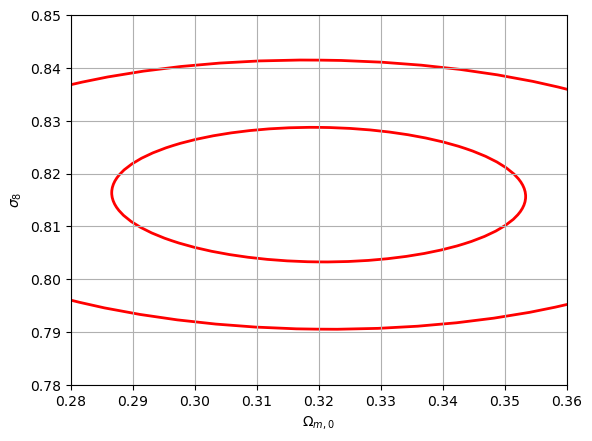

In [85]:
fig, ax = plt.subplots()

cov_ij = cov_matrix[np.ix_([0, 6], [0, 6])]
        
plot_error_ellipse(ax, cov_ij, pos=(0.32, 0.816), nstd=1, edgecolor='red', lw=2, facecolor='none')
plot_error_ellipse(ax, cov_ij, pos=(0.32, 0.816), nstd=2, edgecolor='red', lw=2, facecolor='none')
ax.set_xlim(0.28, 0.36)
ax.set_ylim(0.78, 0.85)
        
ax.set_ylabel('$\sigma_8$')
ax.set_xlabel('$\Omega_{m,0}$')
ax.grid(True)
        
plt.show()

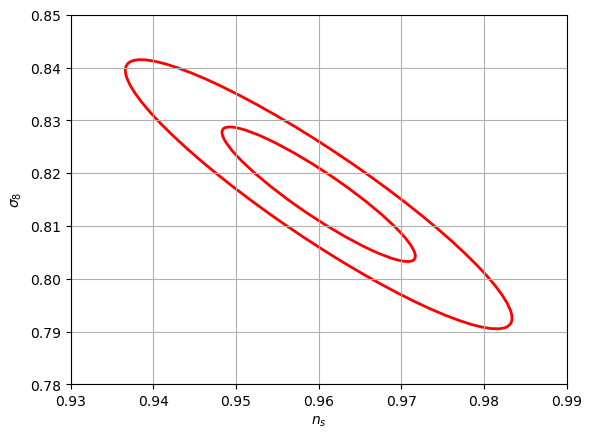

In [101]:
fig, ax = plt.subplots()

cov_ij = cov_matrix[np.ix_([5, 6], [5, 6])]
        
plot_error_ellipse(ax, cov_ij, pos=(0.96, 0.816), nstd=1, edgecolor='red', lw=2, facecolor='none')
plot_error_ellipse(ax, cov_ij, pos=(0.96, 0.816), nstd=2, edgecolor='red', lw=2, facecolor='none')
ax.set_ylim(0.78, 0.85)
ax.set_xlim(0.93, 0.99)
        
ax.set_ylabel('$\sigma_8$')
ax.set_xlabel('$n_s$')
ax.grid(True)
        
plt.show()

# $\Lambda CDM$ non-flat

Parameters:

1. $\Omega_{m,0}$

2. $h$

3. $\Omega_{b,0}$

4. $\Omega{DE,0}$

5. $n_s$

6. $\sigma_9$

In [6]:
Fi_S_NF = np.array([[6732132.04871855, 7308583.44361025,  338469.97323522,
        -239523.18862154, -394527.79405445, 2443829.65844357],
       [7308583.44361025, 8059143.10898852,  375449.67411346,
        -278927.86396302, -448025.01897643, 2696192.42380732],
       [ 338469.97323522,  375449.67411346,   19693.67176464,
         -14338.85730365,  -27141.88036935,  120833.10318562],
       [-239523.18862154, -278927.86396302,  -14338.85730365,
          12193.78956648,   19239.03235327,  -91872.06153863],
       [-394527.79405445, -448025.01897643,  -27141.88036935,
          19239.03235327,   64960.6748734 , -121948.32614714],
       [2443829.65844357, 2696192.42380732,  120833.10318562,
         -91872.06153863, -121948.32614714,  926998.12112022]])

# $w_0$ and $w_a$ non-flat

Parameters:

1. $\Omega_{m,0}$

2. $h$

3. $\Omega_{b,0}$

4. $\Omega_{DE,0}$

5. $w_0$

6. $w_a$

7. $n_s$

8. $\sigma_8$

In [106]:
Fi_DE_NF = np.array([[ 4.58380850e+06,  5.01471891e+06,  4.43969841e+05,
        -1.24169679e+05,  4.73537767e+04,  1.46216501e+04,
        -2.92898760e+05,  1.63554087e+06],
       [ 5.01471891e+06,  5.62964806e+06,  5.15407397e+05,
        -1.58928816e+05,  6.88374027e+04,  1.86079405e+04,
        -3.46318083e+05,  1.83373081e+06],
       [ 4.43969841e+05,  5.15407397e+05,  5.67892232e+04,
        -1.80480972e+04,  7.83141921e+03,  2.18598390e+03,
        -4.29359823e+04,  1.59191014e+05],
       [-1.24169679e+05, -1.58928816e+05, -1.80480972e+04,
         7.50980611e+03, -4.13635414e+03, -8.97307117e+02,
         1.28550421e+04, -5.06990849e+04],
       [ 4.73537767e+04,  6.88374027e+04,  7.83141921e+03,
        -4.13635414e+03,  2.63384569e+03,  4.82599781e+02,
        -5.27835090e+03,  2.28868370e+04],
       [ 1.46216501e+04,  1.86079405e+04,  2.18598390e+03,
        -8.97307117e+02,  4.82599781e+02,  1.09429542e+02,
        -1.53828957e+03,  5.89119658e+03],
       [-2.92898760e+05, -3.46318083e+05, -4.29359823e+04,
         1.28550421e+04, -5.27835090e+03, -1.53828957e+03,
         8.46359868e+04, -6.01817059e+04],
       [ 1.63554087e+06,  1.83373081e+06,  1.59191014e+05,
        -5.06990849e+04,  2.28868370e+04,  5.89119658e+03,
        -6.01817059e+04,  6.48299210e+05]])

cov_matrix = inv(Fi_DE_NF)

print(cov_matrix)

[[ 5.49527910e-03 -5.81839201e-03 -1.11356620e-02 -1.79197559e-01
  -6.93430516e-02 -6.85943912e-01 -1.81765248e-05 -5.96043211e-06]
 [-5.81839201e-03  6.18377759e-03  1.17761005e-02  1.89743336e-01
   7.34727190e-02  7.26332658e-01  6.78341901e-05 -5.31323699e-05]
 [-1.11356620e-02  1.17761005e-02  4.31840744e-02  5.35510781e-01
   2.74185428e-01  1.81005310e+00  1.80710324e-04 -5.20105706e-05]
 [-1.79197559e-01  1.89743336e-01  5.35510781e-01  7.32326013e+00
   3.39834342e+00  2.60713590e+01  1.29241470e-03 -1.70045294e-04]
 [-6.93430516e-02  7.34727190e-02  2.74185428e-01  3.39834342e+00
   1.75412366e+00  1.14623866e+01  1.01711553e-03 -4.36606625e-04]
 [-6.85943912e-01  7.26332658e-01  1.81005310e+00  2.60713590e+01
   1.14623866e+01  9.52249334e+01  2.69670763e-03  7.34692073e-04]
 [-1.81765248e-05  6.78341901e-05  1.80710324e-04  1.29241470e-03
   1.01711553e-03  2.69670763e-03  1.36867246e-04 -1.37024538e-04]
 [-5.96043211e-06 -5.31323699e-05 -5.20105706e-05 -1.70045294e-04
  -

In [107]:
F_wa_w0 = inv(np.array([[1.75412366e+00, 1.14623866e+01], [1.14623866e+01, 9.52249334e+01]]))

determinant = np.linalg.det(F_wa_w0)

FoM = np.sqrt(determinant)

print(FoM)

0.16748280271971833


# $w_0$, $w_a$ and $\gamma$ non-flat

Parameters:

1. $\Omega_{m,0}$

2. $h$

3. $\Omega_{b,0}$

4. $\Omega_{DE,0}$

5. $w_0$

6. $w_a$

7. $n_s$

8. $\sigma_8$

9. $\gamma$

In [103]:
F_DE_gamma_NF = np.array([[ 2.25389923e+06,  3.51279207e+06,  6.48520166e+05,
        -2.41957282e+05,  1.25373299e+05,  2.82492450e+04,
        -1.89789135e+05,  1.16685403e+06, -5.83751384e+00],
       [ 3.51279207e+06,  5.57045549e+06,  1.06879730e+06,
        -3.95080352e+05,  2.03046343e+05,  4.61897743e+04,
        -3.40577310e+05,  1.81881889e+06, -1.35838365e+02],
       [ 6.48520166e+05,  1.06879730e+06,  2.47039995e+05,
        -8.34108085e+04,  3.91094312e+04,  9.92797700e+03,
        -8.22482616e+04,  3.30457718e+05, -3.90397422e+01],
       [-2.41957282e+05, -3.95080352e+05, -8.34108085e+04,
         2.99832080e+04, -1.49202740e+04, -3.55198822e+03,
         2.92395712e+04, -1.24333211e+05,  2.13347829e+01],
       [ 1.25373299e+05,  2.03046343e+05,  3.91094312e+04,
        -1.49202740e+04,  7.83380751e+03,  1.75234725e+03,
        -1.43807319e+04,  6.50361482e+04, -1.43991018e+01],
       [ 2.82492450e+04,  4.61897743e+04,  9.92797700e+03,
        -3.55198822e+03,  1.75234725e+03,  4.23360019e+02,
        -3.47530280e+03,  1.44562124e+04, -2.32366407e+00],
       [-1.89789135e+05, -3.40577310e+05, -8.22482616e+04,
         2.92395712e+04, -1.43807319e+04, -3.47530280e+03,
         8.41850297e+04, -5.85142869e+04,  8.78774362e-01],
       [ 1.16685403e+06,  1.81881889e+06,  3.30457718e+05,
        -1.24333211e+05,  6.50361482e+04,  1.44562124e+04,
        -5.85142869e+04,  6.44685992e+05, -5.29138222e+00],
       [-5.83751384e+00, -1.35838365e+02, -3.90397422e+01,
         2.13347829e+01, -1.43991018e+01, -2.32366407e+00,
         8.78774362e-01, -5.29138222e+00,  6.53240860e+00]])